# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 2.4.11 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240L, 320L, 3L)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240L, 320L)

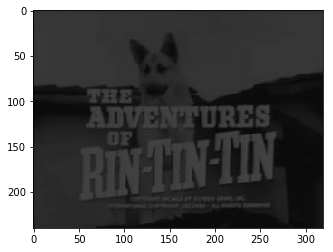

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

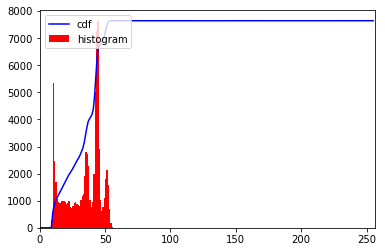

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [8]:
cdf_m = np.ma.masked_equal (cdf, 0)
cdf_m = (cdf_m - cdf_m.min ()) * 255 / (cdf_m.max () - cdf_m.min ())
cdf = np.ma.filled (cdf_m, 0) .astype ( 'uint8' )

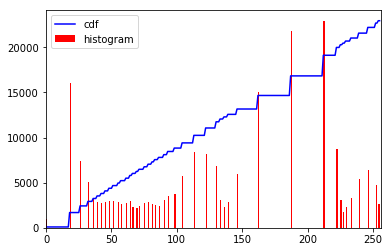

In [9]:
img2 = cdf [rintin]

hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

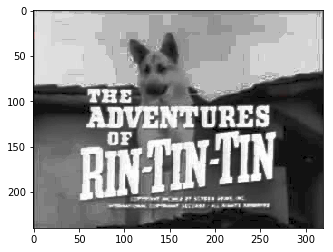

In [10]:
plt.imshow(img2, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [11]:
#Gerando a imagem em RGB
img_box = cv2.imread("hall_box_battery1.jpg")
img_box_rgb = cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB)
cinza = cv2.cvtColor(img_box_rgb, cv2.COLOR_RGB2GRAY)

#### Canais R e B

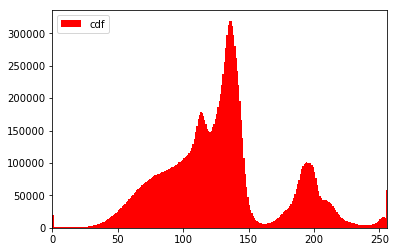

In [12]:
#Dvisao dos canais R e B
r,g,b = cv2.split(img_box_rgb)

#Plot do grafico R
plt.hist(r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

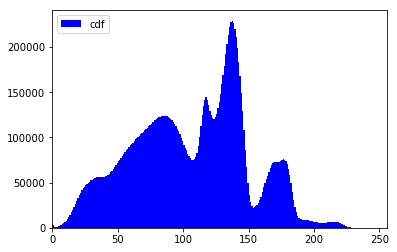

In [13]:
#Plot do grafico B
plt.hist(b.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### Não se pode identificar os blocos azul e vermelho apenas com os histogramas, pois este e apenas é a representação quantitativa de tais classes. 

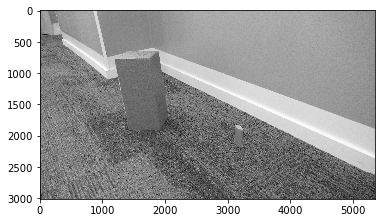

In [14]:
#Imagem Versão cinsa
plt.imshow(cinza, cmap="Greys_r")

#### Identificação da caixa vermelha

In [15]:
for i in range(cinza.shape[0]):
    for j in range(cinza.shape[1]):
        if (img_box_rgb[i][j][0] > 150) and (img_box_rgb[i][j][1] < 130) and (img_box_rgb[i][j][2] < 130):
            cinza[i][j] = 255

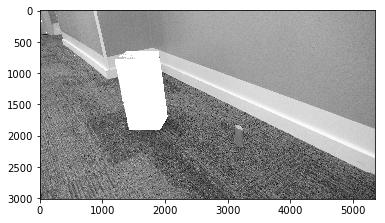

In [16]:
plt.imshow(cinza, cmap="Greys_r")